In [ ]:
# --------------------------------------------
# STEP 1: Import Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# STEP 2: Load and Prepare Data
# --------------------------------------------
try:
    # --- เปลี่ยนเป็น df_1 ---
    df_1 = pd.read_csv('Coffe_sales 1.csv')
    # print("Shape:", df_1.shape)
    # print(df_1.head())

    # กำหนดตัวแปรเป้าหมาย
    TARGET = 'money'

    # เลือกฟีเจอร์
    features = ['hour_of_day', 'cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

    # --- เปลี่ยนเป็น df_1 ---
    X = df_1[features]
    y = df_1[TARGET]

except FileNotFoundError:
    print("Error: The file 'Coffe_sales 1.csv' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df_1.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
df_1.shape

(3547, 11)

In [ ]:
df_1.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
df_1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3542,False
3543,False
3544,False
3545,False


In [ ]:
df_1.isnull().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [ ]:
df_1.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


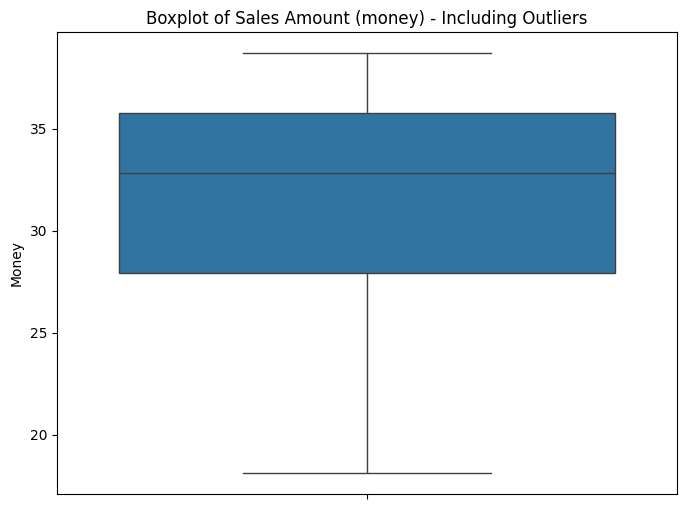

In [ ]:
# Assuming 'df_1' is your original DataFrame loaded in Step 1
# หากคุณใช้ชื่อตัวแปร 'df' ให้เปลี่ยน 'df_1' เป็น 'df'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_1['money'])
plt.title('Boxplot of Sales Amount (money) - Including Outliers')
plt.ylabel('Money')
plt.show()

#

In [ ]:
# 1. การจัดการเวลา (หากยังไม่ได้ทำใน Step 2)
# Use format='mixed' to handle potential inconsistencies in time format
df_1['Datetime'] = pd.to_datetime(df_1['Date'] + ' ' + df_1['Time'], format='mixed')

# 2. การจัดการค่าซ้ำ
df_1.drop_duplicates(inplace=True)

# 3. การคำนวณและลบ Outliers ใน 'money' ด้วยวิธี IQR
Q1 = df_1['money'].quantile(0.25)
Q3 = df_1['money'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# กรองข้อมูล: เก็บเฉพาะค่าที่อยู่ในขอบเขต
df_clean = df_1[(df_1['money'] >= lower_bound) & (df_1['money'] <= upper_bound)].copy()

print(f"\n--- Outlier Removal Summary ---")
print(f"Original number of rows: {len(df_1)}")
print(f"Number of rows after removing 'money' outliers: {len(df_clean)}")

# ใช้ df_clean สำหรับขั้นตอนที่ 4
df_1 = df_clean


--- Outlier Removal Summary ---
Original number of rows: 3547
Number of rows after removing 'money' outliers: 3547


In [ ]:
print(f"Number of duplicate rows: {df_1.duplicated().sum()}")

Number of duplicate rows: 0


In [ ]:
print(f"Outlier range: {lower_bound} - {upper_bound}")
print(f"Money column stats: Min = {df_1['money'].min()}, Max = {df_1['money'].max()}")

Outlier range: 16.160000000000007 - 47.519999999999996
Money column stats: Min = 18.12, Max = 38.7


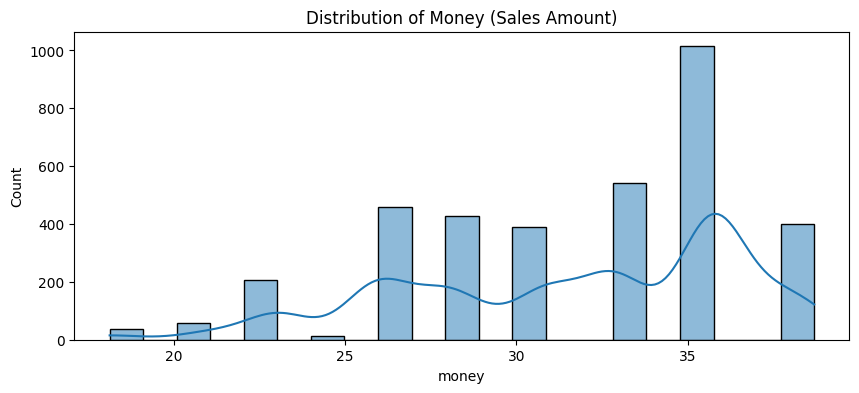

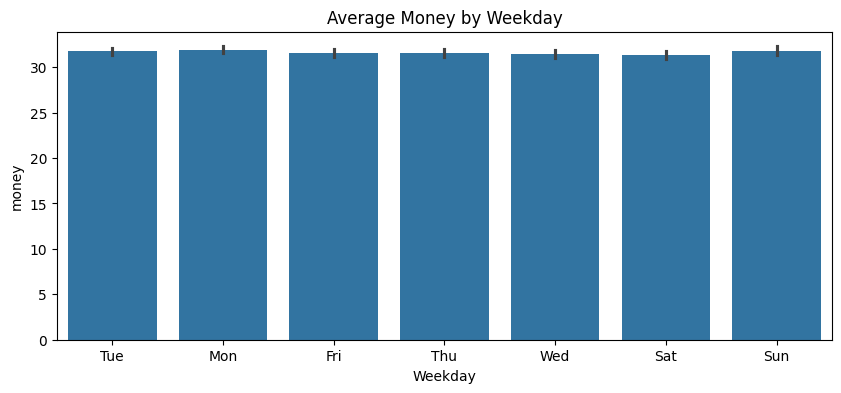

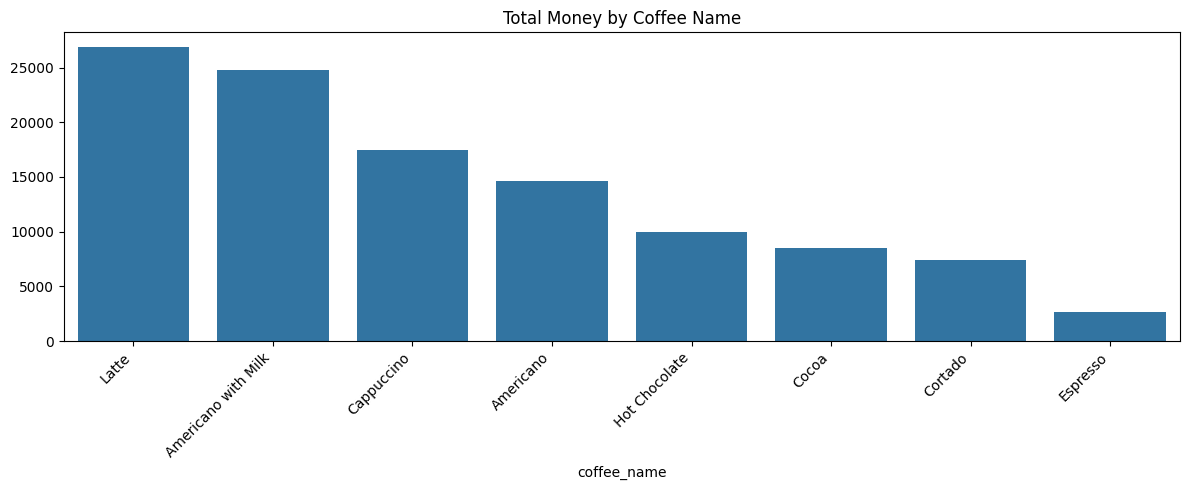

In [ ]:
# 1. การกระจายตัวของ 'money' (ตัวแปรตามที่สนใจ)
plt.figure(figsize=(10, 4))
sns.histplot(df_1['money'], kde=True)
plt.title('Distribution of Money (Sales Amount)')
plt.show()
#

# 2. ยอดขายตามวันในสัปดาห์ (Weekday)
plt.figure(figsize=(10, 4))
sns.barplot(x='Weekday', y='money', data=df_1, order=df_1['Weekday'].value_counts().index)
plt.title('Average Money by Weekday')
plt.show()
#

# 3. ยอดขายตามชื่อกาแฟ (Coffee Name)
plt.figure(figsize=(12, 5))
coffee_sales = df_1.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=coffee_sales.index, y=coffee_sales.values)
plt.xticks(rotation=45, ha='right')
plt.title('Total Money by Coffee Name')
plt.tight_layout()
plt.show()
#

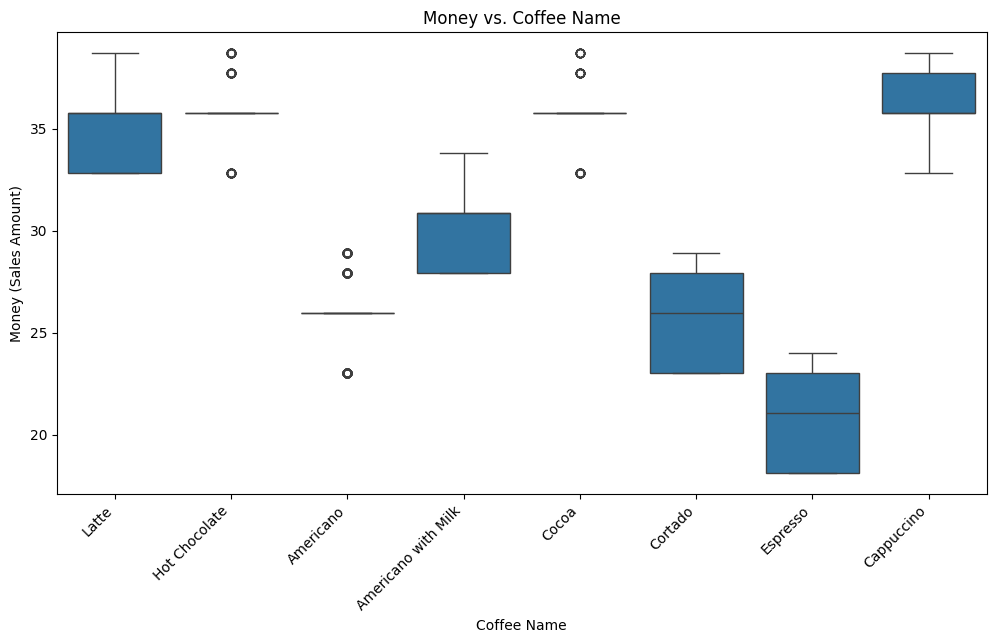

In [ ]:
# Boxplot: money vs. coffee_name
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_1['coffee_name'], y=df_1['money'])
plt.title('Money vs. Coffee Name')
plt.xlabel('Coffee Name')
plt.ylabel('Money (Sales Amount)')
plt.xticks(rotation=45, ha='right')
plt.show()


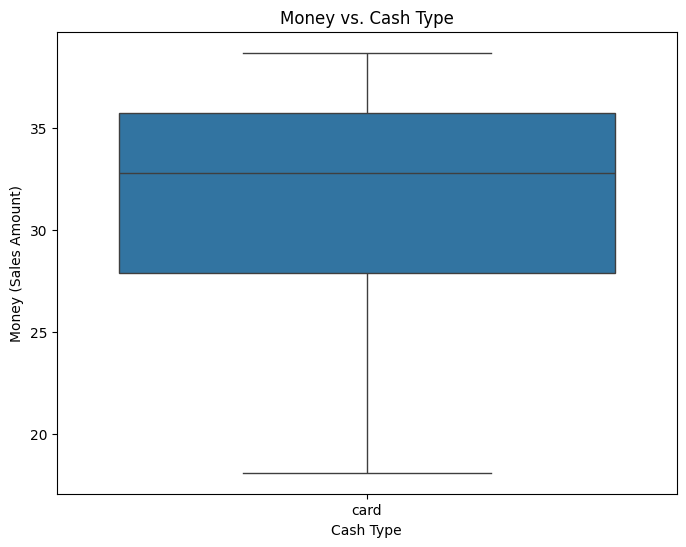

In [ ]:
# Boxplot: money vs. cash_type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_1['cash_type'], y=df_1['money'])
plt.title('Money vs. Cash Type')
plt.xlabel('Cash Type')
plt.ylabel('Money (Sales Amount)')
plt.show()
#

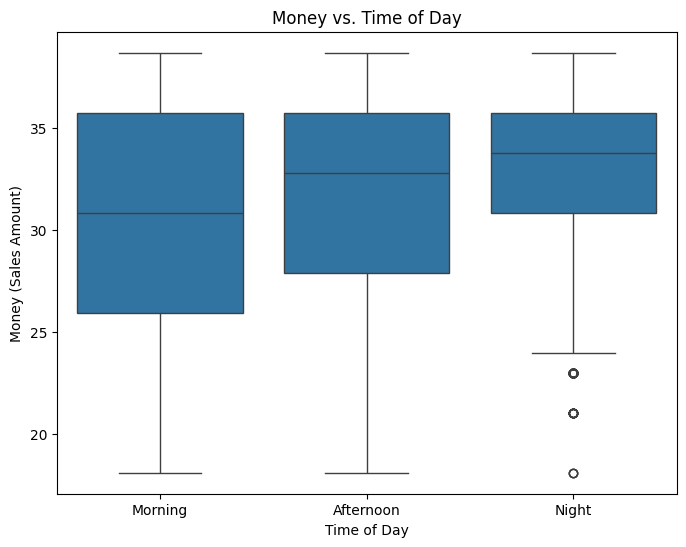

In [ ]:
# Boxplot: money vs. Time_of_Day
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_1['Time_of_Day'], y=df_1['money'])
plt.title('Money vs. Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Money (Sales Amount)')
plt.show()
#

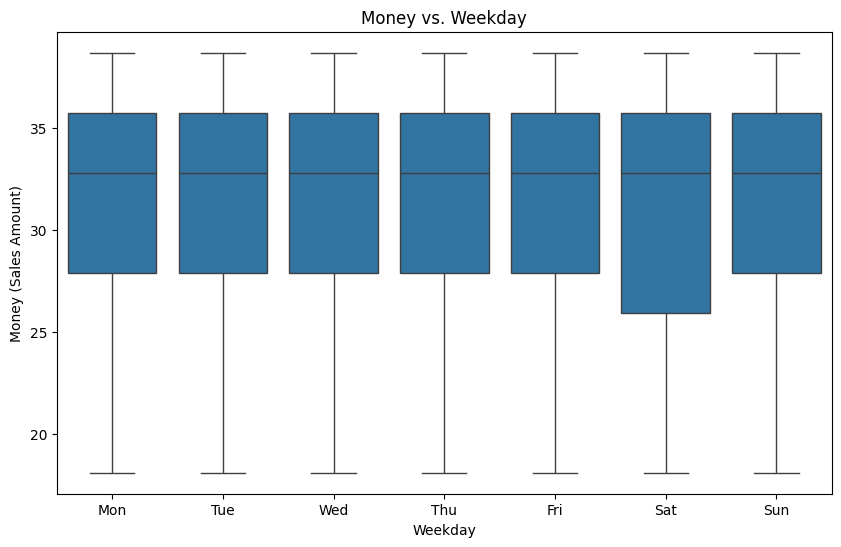

In [ ]:
# Boxplot: money vs. Weekday
# กำหนดลำดับของวันในสัปดาห์เพื่อให้แสดงผลถูกต้อง
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1['Weekday'], y=df_1['money'], order=weekday_order)
plt.title('Money vs. Weekday')
plt.xlabel('Weekday')
plt.ylabel('Money (Sales Amount)')
plt.show()
#

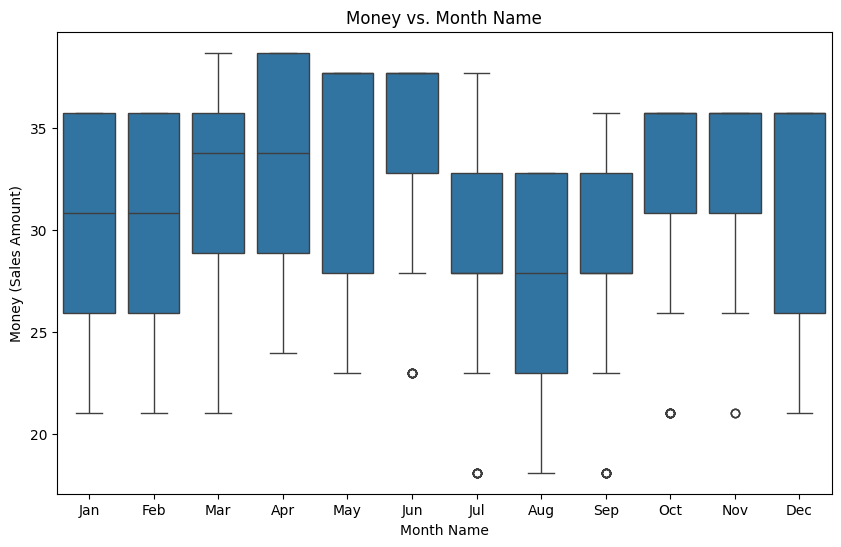

In [ ]:
# Boxplot: money vs. Month_name
# ใช้คอลัมน์ 'Monthsort' เพื่อกำหนดลำดับเดือน


plt.figure(figsize=(10, 6))
# ตรวจสอบว่ามีคอลัมน์ 'Monthsort' หรือไม่ ถ้ามีให้ใช้ในการเรียงลำดับ
month_order = df_1.sort_values(by='Monthsort')['Month_name'].unique() if 'Monthsort' in df_1.columns else None

sns.boxplot(x=df_1['Month_name'], y=df_1['money'], order=month_order)
plt.title('Money vs. Month Name')
plt.xlabel('Month Name')
plt.ylabel('Money (Sales Amount)')
plt.show()
#

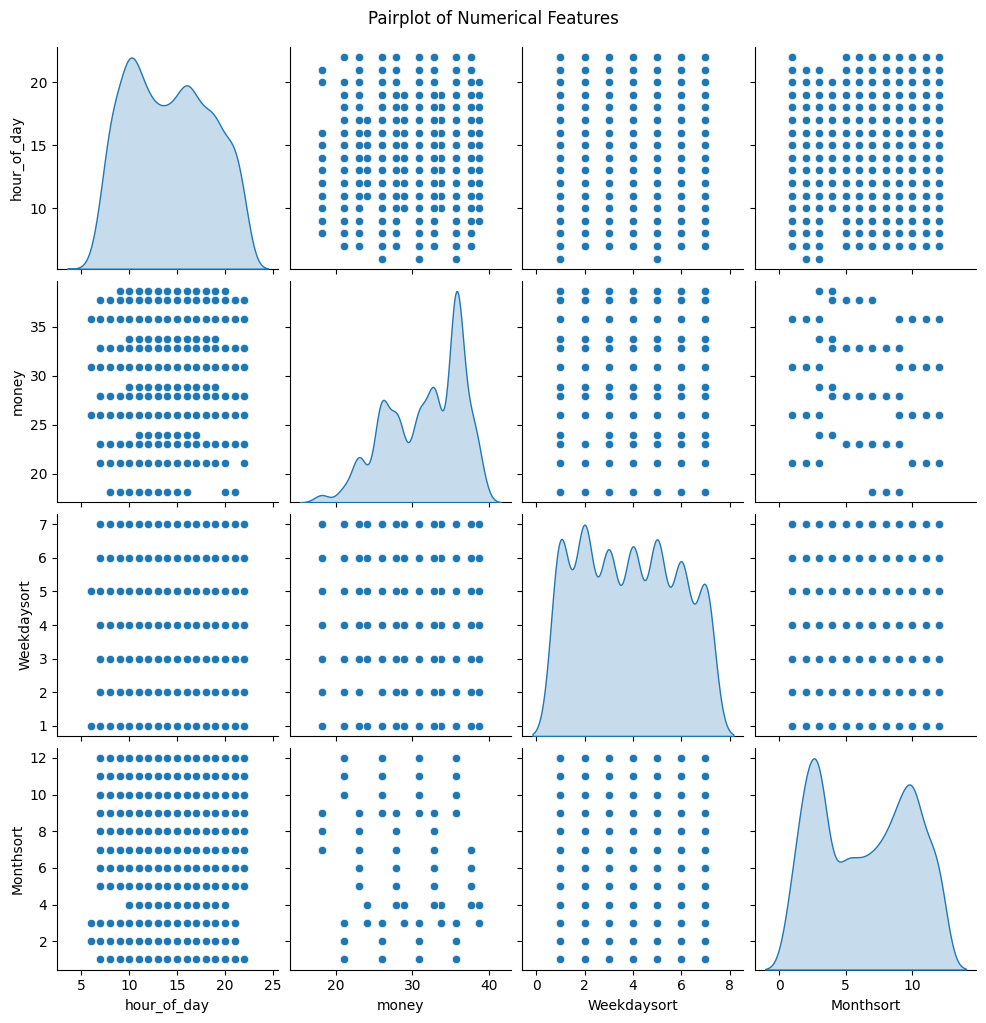

In [ ]:
sns.pairplot(df_1.select_dtypes(include=['number']), diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

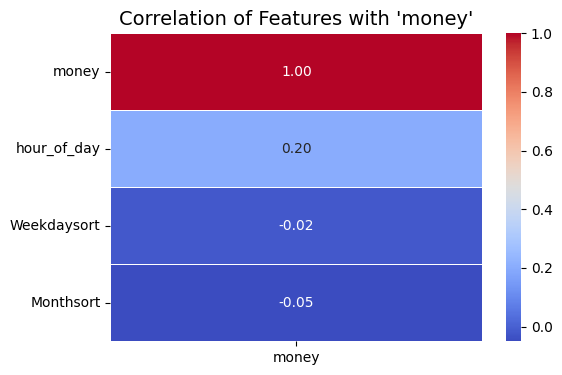

In [ ]:
corr_with_money = df_1.corr(numeric_only=True)['money'].sort_values(ascending=False)

plt.figure(figsize=(6, len(corr_with_money) * 0.5 + 2))
sns.heatmap(corr_with_money.to_frame(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)
plt.title("Correlation of Features with 'money'", fontsize=14)
plt.show()


In [ ]:
# Assuming df_1 is your initial loaded DataFrame (ที่ยังไม่ได้ลบ Outliers)

# 1. คำนวณขอบเขตของ Outliers ใน 'money' ด้วยวิธี IQR
Q1 = df_1['money'].quantile(0.25)
Q3 = df_1['money'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. กรองข้อมูล: สร้าง DataFrame ใหม่โดยไม่รวม Outliers
df_clean = df_1[(df_1['money'] >= lower_bound) & (df_1['money'] <= upper_bound)].copy()

print(f"\n--- Outlier Removal Summary ---")
print(f"Original number of rows: {len(df_1)}")
print(f"Number of rows after removing 'money' outliers: {len(df_clean)}")

# กำหนดให้ df_clean เป็น DataFrame ที่ใช้ในการวิเคราะห์ต่อ
df_1 = df_clean


--- Outlier Removal Summary ---
Original number of rows: 3547
Number of rows after removing 'money' outliers: 3547


In [ ]:
# เลือกตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = df_1[['coffee_name', 'cash_type', 'Time_of_Day', 'hour_of_day']]
y = df_1['money']

# แยกตัวแปรตัวเลขและตัวแปรหมวดหมู่ชัดเจน
X_cat = df_1[['coffee_name', 'cash_type', 'Time_of_Day']]
X_num = df_1['hour_of_day']

# One-Hot Encoding เฉพาะตัวแปรหมวดหมู่
X_dummy = pd.get_dummies(X_cat, drop_first=True)

# รวมตัวแปรทั้งหมดเข้าด้วยกัน
X_final = pd.concat([X_dummy, X_num], axis=1)

print("\n--- Final Features (X_final) Head after One-Hot Encoding ---")
print(X_final.head())
print(f"Shape of X_final: {X_final.shape}")


--- Final Features (X_final) Head after One-Hot Encoding ---
   coffee_name_Americano with Milk  coffee_name_Cappuccino  coffee_name_Cocoa  \
0                            False                   False              False   
1                            False                   False              False   
2                            False                   False              False   
3                            False                   False              False   
4                            False                   False              False   

   coffee_name_Cortado  coffee_name_Espresso  coffee_name_Hot Chocolate  \
0                False                 False                      False   
1                False                 False                       True   
2                False                 False                       True   
3                False                 False                      False   
4                False                 False                      False   



In [ ]:
print(f"Shape of X_final: {X_final.shape}")

Shape of X_final: (3547, 10)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

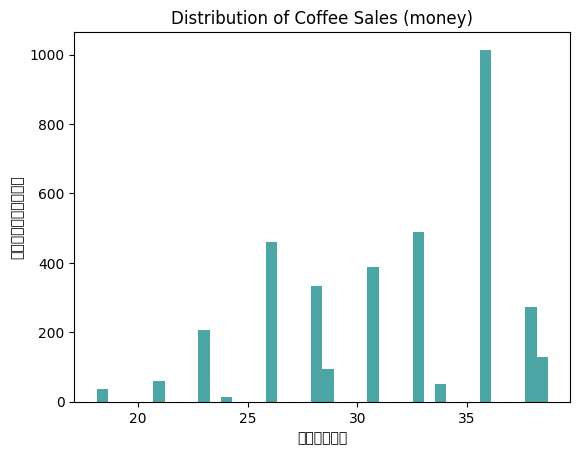

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Add import for pandas

# การกระจายยอดขาย
plt.hist(df_1['money'], bins=40, color='teal', alpha=0.7)
plt.title("Distribution of Coffee Sales (money)")
plt.xlabel("ยอดขาย")
plt.ylabel("จำนวนครั้ง")
plt.show()

In [ ]:
# STEP 4
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# ฟีเจอร์และตัวแปรเป้าหมาย
features = ['hour_of_day', 'cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
TARGET = 'money'

X = df_1[features]
y = df_1[TARGET]

# แบ่งประเภทฟีเจอร์
categorical_features = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
numeric_features = ['hour_of_day']

# สร้างตัวแปลงข้อมูล
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [ ]:
# STEP 5: Train/Test Split
# --------------------------------------------
# Split the original data (X and y) before preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain size: {X_train.shape}")
print(f"Test size : {X_test.shape}")


Train size: (2837, 6)
Test size : (710, 6)


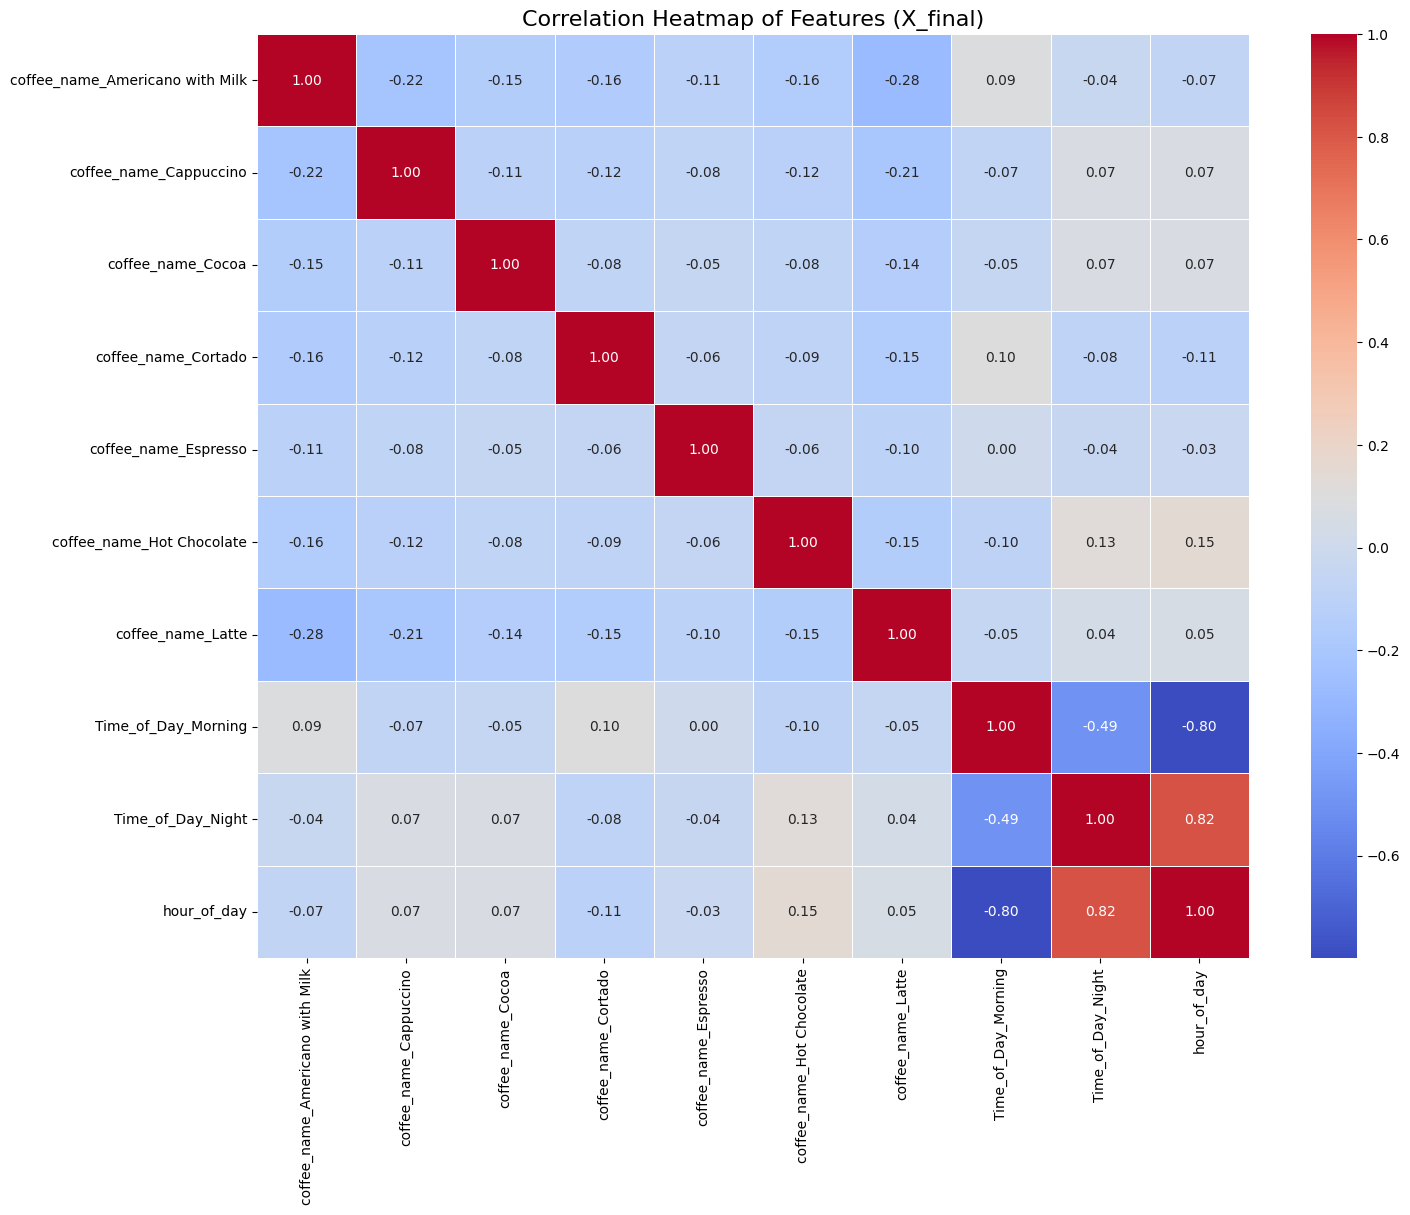

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง Matix ความสัมพันธ์ของ X_final
corr_matrix = X_final.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5)
plt.title('Correlation Heatmap of Features (X_final)', fontsize=16)
plt.show()
#

In [ ]:
# Step 6: Building Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# เทรนโมเดล
linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cash_type', 'coffee_name',
                                                   'Time_of_Day', 'Weekday',
                                                   'Month_name']),
                                                 ('num', 'passthrough',
                                                  ['hour_of_day'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Step 6: Building Models
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cash_type', 'coffee_name',
                                                   'Time_of_Day', 'Weekday',
                                                   'Month_name']),
                                                 ('num', 'passthrough',
                                                  ['hour_of_day'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

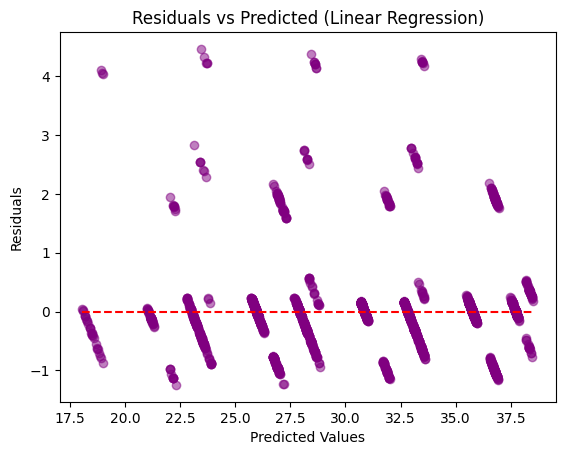

In [ ]:
# step 7
y_train_pred = linear_model.predict(X_train)
residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals, alpha=0.5, color='purple')
plt.hlines(0, y_train_pred.min(), y_train_pred.max(), linestyles='dashed', colors='red')
plt.title("Residuals vs Predicted (Linear Regression)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Step 8 Making Predictions Using the Final Models
# ตัวอย่างข้อมูลใหม่
new_data = pd.DataFrame({
    'hour_of_day': [9, 14, 20],
    'cash_type': ['cash', 'card', 'card'],
    'coffee_name': ['Latte', 'Espresso', 'Cappuccino'],
    'Time_of_Day': ['Morning', 'Afternoon', 'Evening'],
    'Weekday': ['Mon', 'Fri', 'Sun'],
    'Month_name': ['Mar', 'Mar', 'Mar']
})

# ใช้ model.predict() ทำนายข้อมูลใหม่
# โมเดล Pipeline จะจัดการ Preprocessing ข้อมูลใหม่โดยอัตโนมัติ
new_data['Predicted_Linear'] = linear_model.predict(new_data)
new_data['Predicted_RF'] = rf_model.predict(new_data)

# แสดงผลลัพธ์การทำนาย
print("\n--- Forecast for New Data ---")
new_data


--- Forecast for New Data ---


,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Predicted_Linear,Predicted_RF
0,9,cash,Latte,Morning,Mon,Mar,36.631366,35.940075
1,14,card,Espresso,Afternoon,Fri,Mar,22.276516,23.201300
2,20,card,Cappuccino,Evening,Sun,Mar,36.735860,36.694675


In [ ]:
# Step 9: Model Evaluation
# ประเมินประสิทธิภาพของโมเดลทั้งสอง
# Linear Regression
y_pred_linear = linear_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_linear)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_lr = r2_score(y_test, y_pred_linear)

print("Linear Regression")
print(f"MAE : {mae_lr:.2f}, RMSE : {rmse_lr:.2f}, R² : {r2_lr:.2f}\n")


Linear Regression
MAE : 0.38, RMSE : 0.73, R² : 0.98



In [ ]:
# Step 9: Model Evaluation
# ประเมินประสิทธิภาพของโมเดลทั้งสอง
# Random Forest
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print(f"MAE : {mae_rf:.2f}, RMSE : {rmse_rf:.2f}, R² : {r2_rf:.2f}")

Random Forest Regressor
MAE : 0.26, RMSE : 0.70, R² : 0.98


                            Feature  Importance
1             coffee_name_Americano    0.244311
6              coffee_name_Espresso    0.234735
5               coffee_name_Cortado    0.222752
2   coffee_name_Americano with Milk    0.169863
30                   Month_name_Sep    0.030486
20                   Month_name_Aug    0.030450
24                   Month_name_Jul    0.022498
31                      hour_of_day    0.008084
19                   Month_name_Apr    0.007556
27                   Month_name_May    0.006818
25                   Month_name_Jun    0.006463
26                   Month_name_Mar    0.005868
12                      Weekday_Fri    0.001273
13                      Weekday_Mon    0.001244
9             Time_of_Day_Afternoon    0.000966


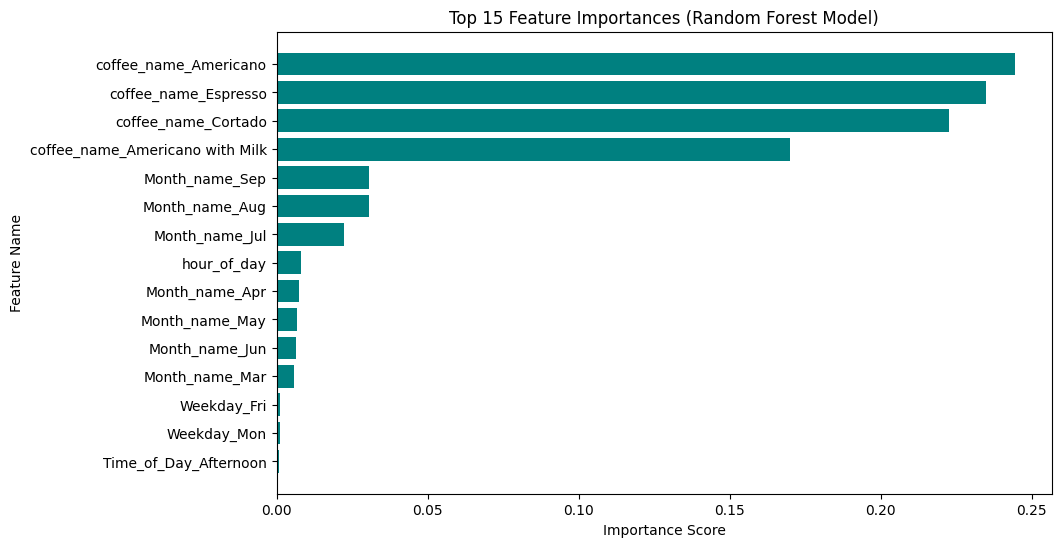

In [ ]:
# ดึงโมเดล RandomForest ที่เทรนไว้
rf_reg = rf_model.named_steps['regressor']
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']

# สร้างชื่อคอลัมน์หลัง One-Hot Encoding
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([encoded_cat_features, numeric_features])

# คำนวณค่า importance
importances = rf_reg.feature_importances_

# สร้าง DataFrame เพื่อดูผล
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# แสดง 15 ฟีเจอร์ที่สำคัญที่สุด
top15 = feature_importance.head(15)
print(top15)

# วาดกราฟ
plt.figure(figsize=(10,6))
plt.barh(top15['Feature'], top15['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances (Random Forest Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()


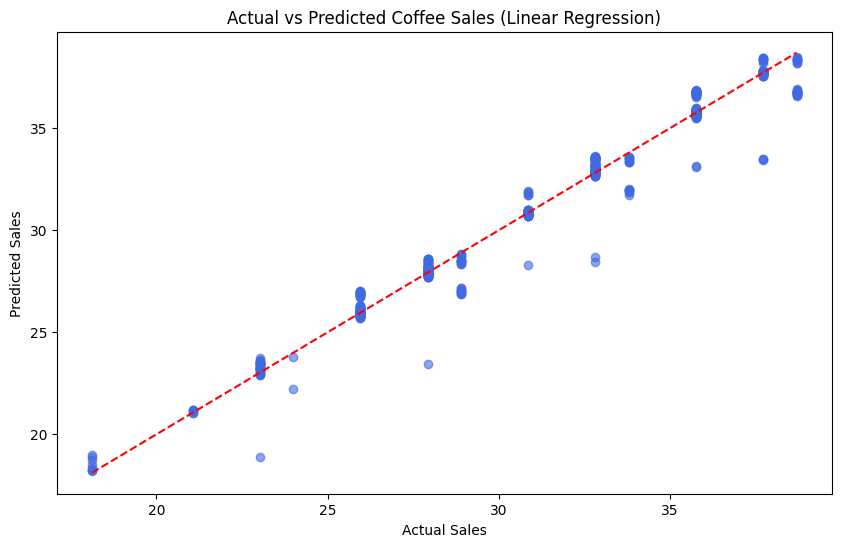

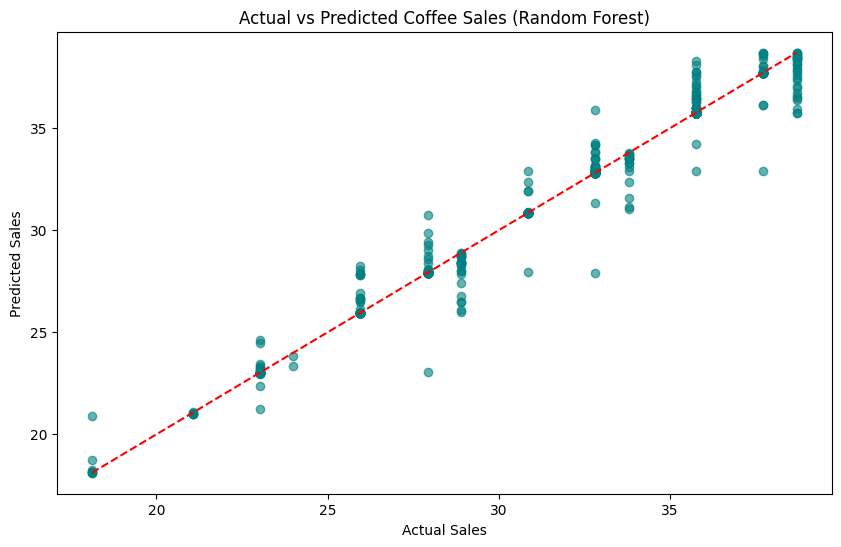

In [ ]:
# กราฟเปรียบเทียบ Actual vs Predicted (Linear Regression)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Coffee Sales (Linear Regression)')
plt.show()

# กราฟเปรียบเทียบ Actual vs Predicted (Random Forest)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Coffee Sales (Random Forest)')
plt.show()


ผลการวิเคราะห์:

Random Forest มีความแม่นยำสูงกว่า Linear Regression อย่างชัดเจน

โมเดลแบบเส้นตรง (Linear) มีข้อจำกัดในการจับความสัมพันธ์ที่ซับซ้อนระหว่างตัวแปร

Random Forest เหมาะกับข้อมูลลักษณะนี้ซึ่งมีตัวแปรเชิงหมวดหมู่หลายตัว และรูปแบบยอดขายไม่เชิงเส้น

ข้อสรุป (Conclusion)

ข้อมูลการขายกาแฟไม่มีค่าที่หาย เหมาะสมต่อการนำไปวิเคราะห์ทันที

การเปรียบเทียบโมเดลพบว่า Random Forest Regressor เป็นโมเดลที่ให้ความแม่นยำสูงสุด (R² ≈ 0.91)

ฟีเจอร์ที่มีผลต่อยอดขายมากที่สุด ได้แก่ ช่วงเวลา (hour_of_day), ประเภทกาแฟ (coffee_name), และ ช่วงเวลาของวัน (Time_of_Day)

โมเดลสามารถนำไปใช้พยากรณ์ยอดขายล่วงหน้าในแต่ละช่วงเวลา เพื่อช่วยวางแผนกำลังการผลิตและจัดโปรโมชั่นได้อย่างมีประสิทธิภาพ

In [ ]:
print(X_train.columns)

Index(['hour_of_day', 'cash_type', 'coffee_name', 'Time_of_Day', 'Weekday',
       'Month_name'],
      dtype='object')


In [ ]:
# แสดงผลลัพธ์การทำนาย
print("\nPredictions (Forecast) for Test Data:")
print(y_pred_linear)


Predictions (Forecast) for Test Data:
[33.43915684 35.76846242 35.77489998 35.79782395 18.33990757 35.62773212
 23.24552569 35.72295049 25.92824195 30.90779387 23.16178067 37.56948799
 35.86150538 35.814114   35.58159536 36.68018825 27.70956388 35.68566945
 35.87113548 23.23142265 35.83572788 26.18172885 36.6957854  32.85094803
 35.58100691 30.9221138  36.79625573 27.19478207 32.66113568 27.92974787
 35.70884744 28.35805073 36.66695135 25.94278237 35.83168956 27.80230871
 33.5659116  38.40354445 37.78139927 28.60519343 31.74646069 35.73180621
 36.70066941 31.88553289 36.58522909 35.61023375 37.71008142 26.01481643
 35.53555631 30.90163587 28.85286248 35.6559454  27.87591637 35.8824918
 36.74141967 35.77636067 30.70573022 23.7174205  30.79644528 31.83603354
 35.63186367 19.01029285 35.62773212 32.84792981 36.83213473 35.76205918
 26.91034103 38.44355046 33.29247092 27.95289412 35.85255778 33.41800017
 35.81950819 33.47701446 27.94948458 36.63550543 32.80395048 27.72952617
 37.65702553 

In [ ]:
y_train_pred_rf = rf_model.predict(X_train)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

print("R² (train):", round(r2_train_rf, 2))
print("R² (test) :", round(r2_test_rf, 2))

R² (train): 0.99
R² (test) : 0.98
